In [1]:
from wordle_game import *
from players import *
from helper_funcs import *
import json

In [2]:
filename = 'official_word_bank'
words = txt_to_set(f'{filename}.txt')
answer_words = txt_to_set('real_wordles.txt')

In [3]:
# player = RandomPlayer(words, 'monkey')
# player = HumanPlayer(words, 'logan')
# player = InfoPlayer(words, 'info', starting_dict_filename=f'{filename}.json')
# player = InfoPlayerAnswerSet(words, answer_words, 'info_greedy', 'all_guesses_some_answers.json')
player = InfoPlayerHardMode(words, answer_words, 'HardMode', 'all_guesses_some_answers.json')

In [12]:
# info_dict = player.get_info_dict([], True)
# save the info_dict
# with open('info_dict.json', 'w') as json_file:
#     json.dump(info_dict, json_file)

In [5]:
from operator import itemgetter
with open('info_dict.json', 'r') as json_file:
    info_dict = json.load(json_file)
N = 20
best_words = dict(sorted(info_dict.items(), key=itemgetter(1), reverse=True)[:N])
print(best_words)

{'tares': 6.194052544375457, 'lares': 6.149918742453135, 'rales': 6.114343099454237, 'rates': 6.096242642514611, 'teras': 6.076619177276184, 'nares': 6.066830765753906, 'soare': 6.061395399096267, 'tales': 6.0549877614012, 'reais': 6.049777632888335, 'tears': 6.032338670239815, 'arles': 6.0296565323785245, 'tores': 6.018294372182989, 'salet': 6.016842875398268, 'aeros': 6.013480318472092, 'dares': 6.010334729949013, 'saner': 5.999263329266254, 'reals': 5.999162055397667, 'lears': 5.9887820998857695, 'lores': 5.97696856457148, 'serai': 5.973617168039962}


In [13]:
word = 'quite'

In [14]:
verbose = True
guess_history = []
words_guessed = []
success = False

for i in range(6):  # six guesses
    print(f"Turn {i+1}")
    valid_options = remaining_options(answer_words, guess_history)
    print(f'There are {len(valid_options)} possible words')
    if len(valid_options) <= 30:
        print(valid_options)
    
    guess = player.guess(guess_history, verbose=verbose)
    print(f"{player.name} guesses {guess}")
    if not guess_is_legal(words, guess):
        print(f'Illegal guess!')
        print(f'{player.name} cannot guess {guess}.')
        break
    
    result = get_result(word, guess)
    print(result)
    words_guessed.append(guess)
    guess_history.append((guess, result))

    if guess == word:
        print("Good Job!")
        print(f"{player.name} correctly guessed {word} in {i+1} guesses!")
        success = True
        break
if not success:
    print(f"{player.name} was not able to correctly guess {word} in 6 tries...")


Turn 1
There are 2315 possible words
HardMode chooses soare for guess number 1.
HardMode guesses soare
----G
Turn 2
There are 79 possible words
{'tuile': 4.684915996127347, 'guile': 4.535669794332146, 'utile': 4.502794280141213, 'tilde': 4.295887868701155, 'ligne': 4.220520907858559, 'nudie': 4.219590194002184, 'cutie': 4.216021849355725, 'tinge': 4.201817299464301, 'cline': 4.1912158279238785, 'mulie': 4.143640826913577}
HardMode chooses tuile for guess number 2.
HardMode guesses tuile
YGG-G
Turn 3
There are 1 possible words
{'quite'}
HardMode guesses quite
GGGGG
Good Job!
HardMode correctly guessed quite in 3 guesses!


# Use the player to solve wordle without knowing the starting word

In [5]:
verbose = True
guess_history = []
words_guessed = []
success = False
for i in range(6):  # six guesses
    print(f"Turn {i+1}")
    valid_options = remaining_options(answer_words, guess_history)
    print(f'There are {len(valid_options)} possible words')
    if len(valid_options) <= 30:
        print(valid_options)
    
    guess = player.guess(guess_history, verbose)
    print(f"{player.name} guesses {guess}")
    # if not guess_is_legal(words, guess):
    #     print(f'Illegal guess!')
    #     print(f'{player.name} cannot guess {guess}.')
    #     break
    
    # enter the result
    result = input(f"Enter the result for guess {i+1}: ")
    print(f"Result: {result}")
    words_guessed.append(guess)
    guess_history.append((guess, result))

    if result == 'GGGGG':
        print("Good Job!")
        print(f"{player.name} correctly guessed {guess} in {i+1} guesses!")
        success = True
        break
if not success:
    print(f"{player.name} was not able to correctly guess the word in 6 tries...")

Turn 1
There are 1 possible words
{'paint'}
info_greedy guesses paint
Result: GGGGG
Good Job!
info_greedy correctly guessed paint in 1 guesses!


# Simulation to see how good the player is on all words

In [15]:
real_words = txt_to_set('real_wordles.txt')
real_words = list(real_words)
print(real_words)

['fault', 'hefty', 'drill', 'jaunt', 'lunch', 'pixie', 'cavil', 'shyly', 'terra', 'amity', 'stash', 'paint', 'quark', 'cycle', 'mango', 'surer', 'gonad', 'brick', 'dozen', 'inept', 'cried', 'haste', 'ruddy', 'drain', 'surge', 'valet', 'slave', 'apply', 'dryer', 'cacao', 'comfy', 'close', 'tight', 'swear', 'agape', 'bigot', 'mulch', 'serif', 'prove', 'pooch', 'virus', 'quasi', 'ashen', 'gaudy', 'smith', 'later', 'sling', 'eject', 'raspy', 'penne', 'wince', 'never', 'glass', 'diary', 'aroma', 'issue', 'fling', 'carry', 'bathe', 'spree', 'clock', 'audio', 'verge', 'magma', 'blink', 'rider', 'guava', 'gaffe', 'joint', 'hello', 'mange', 'wedge', 'stomp', 'trace', 'elegy', 'brook', 'macho', 'decoy', 'dodgy', 'oddly', 'slice', 'nicer', 'event', 'shown', 'album', 'scalp', 'heath', 'cynic', 'woody', 'verso', 'guilt', 'offal', 'trade', 'alpha', 'rower', 'poise', 'unzip', 'buyer', 'elect', 'tonal', 'wooly', 'creed', 'bread', 'chord', 'habit', 'chump', 'grope', 'deign', 'churn', 'shunt', 'hairy', 

In [15]:
player = InfoPlayerAnswerSet(words, real_words, 'info_w_real_words', starting_dict_filename='all_guesses_some_answers.json')

all_guesses_some_answers.json does not exist yet. Creating it now...
0.0% done...
{}
15.42% done...
{'saner': 5.73371326735009, 'tears': 5.718023488063662, 'react': 5.696353951200049, 'coate': 5.67441027154437, 'stane': 5.658276838764491, 'peart': 5.653165815043657, 'cater': 5.646714898485086, 'stire': 5.641458352410144, 'reals': 5.6332137850668005, 'scare': 5.6304894937034895}
30.84% done...
{'salet': 5.834581525865654, 'stare': 5.8072800351609315, 'raine': 5.786709827456233, 'taler': 5.770612389804926, 'carle': 5.770479071966424, 'saner': 5.73371326735009, 'torse': 5.723380047282173, 'tears': 5.718023488063662, 'alter': 5.71317072807757, 'prate': 5.700636328430548}
46.25% done...
{'roate': 5.882779324291974, 'slate': 5.85577537695597, 'salet': 5.834581525865654, 'trace': 5.8305487138594465, 'orate': 5.817161175806051, 'stare': 5.8072800351609315, 'raine': 5.786709827456233, 'taler': 5.770612389804926, 'carle': 5.770479071966424, 'snare': 5.770088860457006}
61.67% done...
{'roate': 5.

In [16]:
N = 50
wins = 0
guess_counts = []
for i, w in enumerate(real_words[:N]):
    if i % 4 == 0:
        print(f'{round(i / N * 100, 4)}% done...')
        if i > 0:
            print(f"{round(wins/i * 100, 4)}% of the games won so far")
            print(f"Average guesses: {round(sum(guess_counts) / len(guess_counts), 4)}")
    outcome, guesses = play_game(real_words, w, player, verbose=False)
    guess_counts.append(len(guesses))
    if outcome:
        wins += 1
print("Done.")
print(f"{player.name} won {round(wins/N * 100, 4)}% of the games")
print(f"Average guesses: {round(sum(guess_counts) / len(guess_counts), 4)}")

0.0% done...
8.0% done...
100.0% of the games won so far
Average guesses: 4.0
16.0% done...
100.0% of the games won so far
Average guesses: 3.75
24.0% done...
100.0% of the games won so far
Average guesses: 3.75
32.0% done...
100.0% of the games won so far
Average guesses: 3.8125
40.0% done...
100.0% of the games won so far
Average guesses: 3.85
48.0% done...
100.0% of the games won so far
Average guesses: 3.9167
56.0% done...
100.0% of the games won so far
Average guesses: 3.8214
64.0% done...
100.0% of the games won so far
Average guesses: 3.7812
72.0% done...
100.0% of the games won so far
Average guesses: 3.7778
80.0% done...
100.0% of the games won so far
Average guesses: 3.725
88.0% done...
100.0% of the games won so far
Average guesses: 3.6818
96.0% done...
100.0% of the games won so far
Average guesses: 3.6875
Done.
HardMode won 100.0% of the games
Average guesses: 3.68


# Visualizations

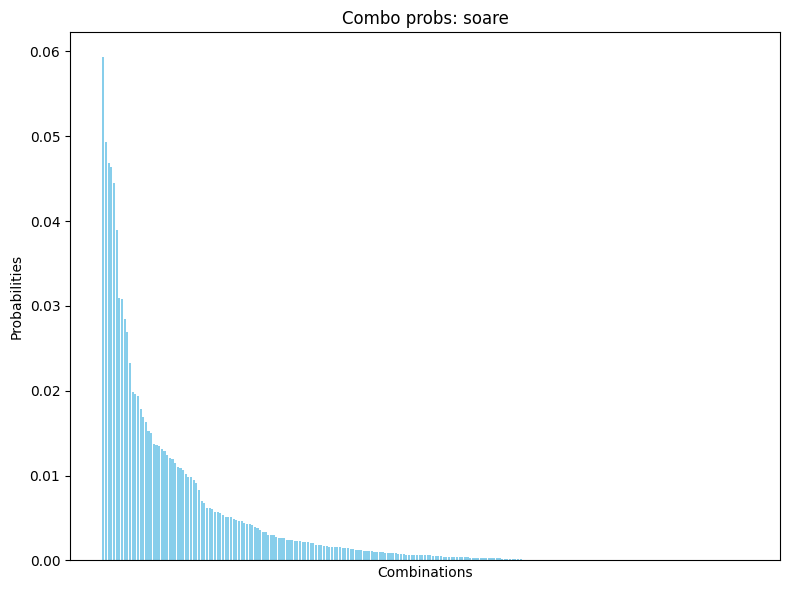

In [16]:
word='soare'
combo_probs = get_combo_probs(words, word)
combo_probs = {k: v for k, v in sorted(combo_probs.items(), key=lambda item: item[1], reverse=True)}

x = list(combo_probs.keys())
y = list(combo_probs.values())
plt.figure(figsize=(8, 6))
plt.bar(x, y, color='skyblue')
plt.xlabel("Combinations")
plt.xticks([])
plt.ylabel("Probabilities")
plt.title(f"Combo probs: {word}")
plt.tight_layout()
plt.show()